## Big Data Module Assignment: Machine Learning with Weather Dataset.

In this individual assignment, I will explore practical machine learning techniques using Jupyter Notebook to analyze data and predict the <b>"RainTomorrow"</b> category from the provided dataset, <b>"weatherAUS.csv"</b>. 

The goal is to effectively apply various machine learning models to handle predictions regarding whether it will rain the next day in Australia based on historical weather data. 

**Done by: Sandhya Palaniappan**

## To Import Libraries and Download the Packages

In [1]:
# !pip install imbalanced-learn

In [2]:
# !pip install xgboost

In [3]:
# !pip install lightgbm

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading and Exploring the weatherAUS Dataset
In this section, I will <b>be reading and exploring the "weatherAUS" dataset</b> from a <b>CSV file</b>.

In [6]:
# To define the file path of the CSV file.
file_path = r'C:\Users\Sandhya Palaniappan\Desktop\PSB604IT - Big Data Module\weatherAUS.csv'

# To read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [7]:
# To display the first five rows of the original dataset.
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [8]:
# To display the last five rows of the original dataset.
print(df.tail())

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6      

In [9]:
# To check the data types of all columns.
column_data_types = df.dtypes
print("\nThe data types of all columns:\n", column_data_types)


The data types of all columns:
 Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [10]:
# Statistics for numeric attributes.
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [11]:
# Statistics for object attributes.
df.describe(include="object")

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [12]:
# To display basic information about the DataFrame, including data types, non-null counts, memory usage, and total entries. 
# It is useful for gaining an overall understanding of the DataFrame's structure.
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
# To get the shape (number of rows and columns) of the DataFrame in pandas by using the shape attribute.
shape = df.shape

In [14]:
# To access the number of rows and columns.
num_rows = shape[0]  # The number of rows.
num_cols = shape[1]  # The number of columns.

# To print the number of rows and columns information.
print(f"\nNumber of rows in the weatherAUS dataset: {num_rows}")
print(f"Number of columns in the weatherAUS dataset: {num_cols}\n")


Number of rows in the weatherAUS dataset: 145460
Number of columns in the weatherAUS dataset: 23



## Data Cleaning and Preprocessing
In this section, I will be <b>performing data cleaning and preprocessing tasks</b> on the <b>weatherAUS dataset</b> to <b>prepare it for analysis and modeling</b>.

<b>Handling Missing Values: <br><li>I will identify and calculate the number of missing values in each column, followed by replacing "NA" values with NaN for consistency.</li></b>

In [15]:
# Step 1: To check for missing values in the dataset.
missing_values = df.isna().sum()
total_rows = len(df)

# To check, calculate, and print the number of missing values for each column.
for column, count in missing_values.items():
    print(f"Number of missing values in column {column}: {count}")

Number of missing values in column Date: 0
Number of missing values in column Location: 0
Number of missing values in column MinTemp: 1485
Number of missing values in column MaxTemp: 1261
Number of missing values in column Rainfall: 3261
Number of missing values in column Evaporation: 62790
Number of missing values in column Sunshine: 69835
Number of missing values in column WindGustDir: 10326
Number of missing values in column WindGustSpeed: 10263
Number of missing values in column WindDir9am: 10566
Number of missing values in column WindDir3pm: 4228
Number of missing values in column WindSpeed9am: 1767
Number of missing values in column WindSpeed3pm: 3062
Number of missing values in column Humidity9am: 2654
Number of missing values in column Humidity3pm: 4507
Number of missing values in column Pressure9am: 15065
Number of missing values in column Pressure3pm: 15028
Number of missing values in column Cloud9am: 55888
Number of missing values in column Cloud3pm: 59358
Number of missing 

In [16]:
# Step 2: Replace "NA" values with NaN for all columns.
df.replace("NA", np.nan, inplace=True)

<b>Imputing Missing Values: <br><li>Missing values in numeric columns are replaced with their respective means. </li><li>Missing values in non-numeric columns (excluding "Date" and "Location") are replaced with their respective modes.</li></b>

In [17]:
# Step 3: Replace missing values in numeric columns with their respective means.
numeric_columns = df.select_dtypes(include=[np.number], exclude=['object'])
for col in numeric_columns.columns:
    col_mean = numeric_columns[col].mean()
    df[col].fillna(col_mean, inplace=True)

In [18]:
# Step 4: Replace missing values in non-numeric columns (excluding "Date" and "Location") with their respective modes.
non_numeric_columns = df.select_dtypes(exclude=[np.number])

# To exclude "Date" and "Location" columns from the list of columns with missing values.
columns_with_missing_values = [col for col in non_numeric_columns.columns if col not in ['Date', 'Location']]

# To iterate through the columns and replace missing values with their respective mode (most frequent value).
for col in columns_with_missing_values:
    col_mode = non_numeric_columns[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

<b>Rounding Numeric Columns:<br><li>Numeric columns are rounded to two decimal places for consistency.</li></b>

In [19]:
# Step 5: Round numeric columns to two decimal places.
columns_to_round = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# To iterate through the columns and round each numeric column's values to two decimal places.
for col in columns_to_round:
    df[col] = df[col].round(2)

<b>Sorting the Location Column:<br><li>The "Location" column is sorted in an alphabetical order.</li></b>

In [20]:
# Step 6: Sort the Location column in an alphabetical order. 
df.sort_values(by='Location', inplace=True)

<b>Final Check for Missing Values:<br><li> I performed a final check for any remaining missing values in the cleaned dataset.</li></b>

In [21]:
# Step 7: Check for blank cells (NaN values) in the entire DataFrame.
missing_values_cleaned = df.isnull().sum()

# To calculate and print the number of missing values for each column in the cleaned dataset.
for column, count in missing_values_cleaned.items():
    print(f"Number of missing values in column {column} after the data cleaning process is: {count}")

Number of missing values in column Date after the data cleaning process is: 0
Number of missing values in column Location after the data cleaning process is: 0
Number of missing values in column MinTemp after the data cleaning process is: 0
Number of missing values in column MaxTemp after the data cleaning process is: 0
Number of missing values in column Rainfall after the data cleaning process is: 0
Number of missing values in column Evaporation after the data cleaning process is: 0
Number of missing values in column Sunshine after the data cleaning process is: 0
Number of missing values in column WindGustDir after the data cleaning process is: 0
Number of missing values in column WindGustSpeed after the data cleaning process is: 0
Number of missing values in column WindDir9am after the data cleaning process is: 0
Number of missing values in column WindDir3pm after the data cleaning process is: 0
Number of missing values in column WindSpeed9am after the data cleaning process is: 0
Num

<b>Displaying Cleaned Data:<br><li>The first and last five rows of the cleaned dataset are displayed for inspection.</li></b>

In [22]:
# Step 8: Display the first five rows of the cleaned dataset.
print(df.head())

             Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
96988  2010-04-30  Adelaide     10.8     21.2       0.0          1.8   
98443  2014-07-22  Adelaide      3.7     19.0       0.0          1.4   
98444  2014-07-23  Adelaide      9.6     15.8       0.0          2.6   
98445  2014-07-24  Adelaide     10.1     15.5      16.6          0.8   
98446  2014-07-25  Adelaide     11.2     16.2       1.8          0.6   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
96988      6.60         ENE           22.0        ENE  ...        66.0   
98443      7.61           N           24.0          N  ...        75.0   
98444      7.61          NE           52.0        NNE  ...        35.0   
98445      7.61         NNE           50.0         NW  ...        96.0   
98446      7.61          NW           30.0        WNW  ...        89.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
96988         48.0       1028.4       1024.7 

In [23]:
# Step 9: Display the last five rows of the cleaned dataset.
print(df.tail())

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
106640  2012-01-14  Woomera     16.8     31.9       0.0        27.00   
106641  2012-01-15  Woomera     17.0     33.5       0.0        12.40   
106642  2012-01-16  Woomera     18.9     38.8       0.0        12.00   
106644  2012-01-18  Woomera     23.5     38.3       0.0        18.20   
108404  2017-01-10  Woomera     21.7     34.5       0.0         5.47   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
106640      7.61         SSE           44.0         SE  ...        51.0   
106641     12.70         SSE           43.0        ESE  ...        38.0   
106642     12.40           N           41.0        ENE  ...        10.0   
106644     13.00         SSE           50.0        SSE  ...        54.0   
108404      7.61          SE           37.0        SSE  ...        71.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
106640         17.0       1017.3      

In [24]:
# Step 10: Save the cleaned weatherAUS dataset.
df.to_csv('C:\\Users\\Sandhya Palaniappan\\Desktop\\PSB604IT - Big Data Module\\cleaned_weatherAUS_dataset.csv', index=False)

## Exploratory Data Analysis (EDA) After Data Cleaning and Preprocessing
Doing <b>Exploratory Data Analysis (EDA)</b> following <b>meticulous data cleaning and preprocessing</b> is a <b>important phase</b> where I will be <b>visually exploring the dataset, identifying patterns, and preparing the data for advanced analysis</b>.

<b>First Visualization: <br><br>Setting the Plotting Style: The code begins by setting the plotting style to 'seaborn,' which enhances the visual aesthetics of the plots. </b>

<b>Visualizing the Distribution of Locations: In this step, I created a countplot to visualize the distribution of locations in the dataset. </b>

<b>The Location column represents various geographical locations, and by rotating the x-axis labels, I ensured the readability for a better and <br>clearer understanding of the location distribution. </b><br>

<b>Noted Observation:</b>
<b><li>Canberra and Sydney are the most common locations in the dataset, with the highest data frequency.</b></li>
<b><li>Many locations have a data frequency close to 3000 samples, indicating a relatively balanced dataset.</b></li>
<b><li>Nhill, Katherine, and Uluru are among the least represented locations, suggesting limited data for these areas.</b></li>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Location'
df_sorted = df.sort_values(by='Location')
# Create a countplot to visualize the distribution of locations in the dataset.
plt.figure(figsize=(15, 5))
sns.countplot(data=df_sorted, x='Location')
plt.xlabel('Location', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability.
plt.tick_params(axis='both', labelsize=13)  # Set font size for both x-axis and y-axis tick labels.
plt.title('\n\nGeographic Distribution of Weather Data: Emphasis on Frequency and Diversity Across Australian Locations', fontsize=13)
plt.show()

<b>Second Visualization: <br><br>Visualizing the Distribution of Minimum and Maximum Temperature:</b>

<b>In this set of subplots, I am visualizing the distribution of both the minimum and maximum temperature variables (MinTemp and MaxTemp).</b>

<b>The left subplot represents the distribution of minimum temperatures, while the right subplot illustrates the distribution of maximum temperatures. </b>

<b>This visualization provides insights into the range and distribution of temperature values in the dataset.</b><br>

<b>Noted Observation:</b>
<b><li>The most common range for minimum temperature falls between 10 to 12 Degree Celsius.</b></li>
<b><li>Similarly, the most common range for maximum temperature falls between 18 to 22 Degree Celsius.</b></li>

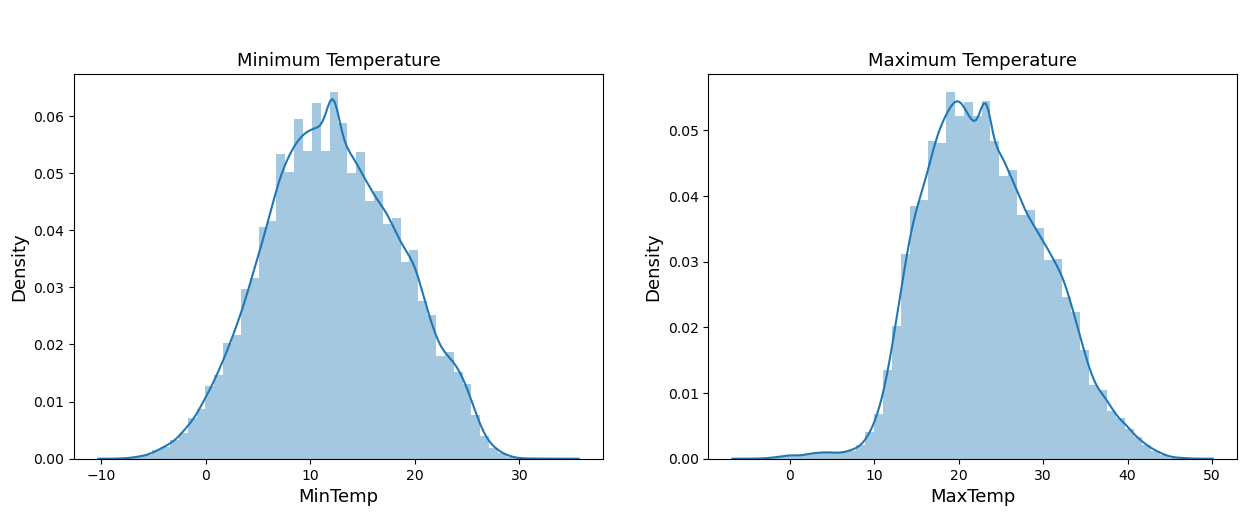

In [26]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress all warnings to ensure clean output.
warnings.filterwarnings("ignore")

# Distribution of MinTemp and MaxTemp.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# MinTemp plot.
sns.distplot(df['MinTemp'], ax=ax[0])
ax[0].set_title("\n\nMinimum Temperature", fontsize=13)  # Set title with specified font size.
ax[0].set_xlabel("MinTemp", fontsize=13)  # Set x-axis label specifically for MinTemp.
ax[0].set_ylabel("Density", fontsize=13)  # Set y-axis label with font size 12.

# MaxTemp plot.
sns.distplot(df['MaxTemp'], ax=ax[1])
ax[1].set_title("\n\nMaximum Temperature", fontsize=13)  # Set title with specified font size.
ax[1].set_xlabel("MaxTemp", fontsize=13)  # Set x-axis label specifically for MaxTemp.
ax[1].set_ylabel("Density", fontsize=13)  # Set y-axis label with font size 12.

plt.show()


<b>Third Visualization: <br><br> I explored the average minimum (MinTemp) and maximum (MaxTemp) temperatures for various locations in the dataset. </b>

<b>Each location is represented on the x-axis, and the corresponding average temperatures in degrees Celsius (°C) are shown on the y-axis. </b>

<b>The maroon colored bars represent the average minimum temperatures, while the salmon colored bars represent the average maximum temperatures. 

<b>The graph provides an insightful comparison of temperature patterns across different locations, making it easier to identify variations in climate. </b>

<b>This information can be valuable for understanding regional temperature trends and their potential impact on weather-related events in these locations.</b><br>

<b>Noted Observation:</b>
<b><li>Most locations have an average maximum temperature which is above 20 degree Celsius.</b></li>
<b><li>Additionally, the average minimum temperature falls between 5 and 15 degrees Celsius for most locations.</b>

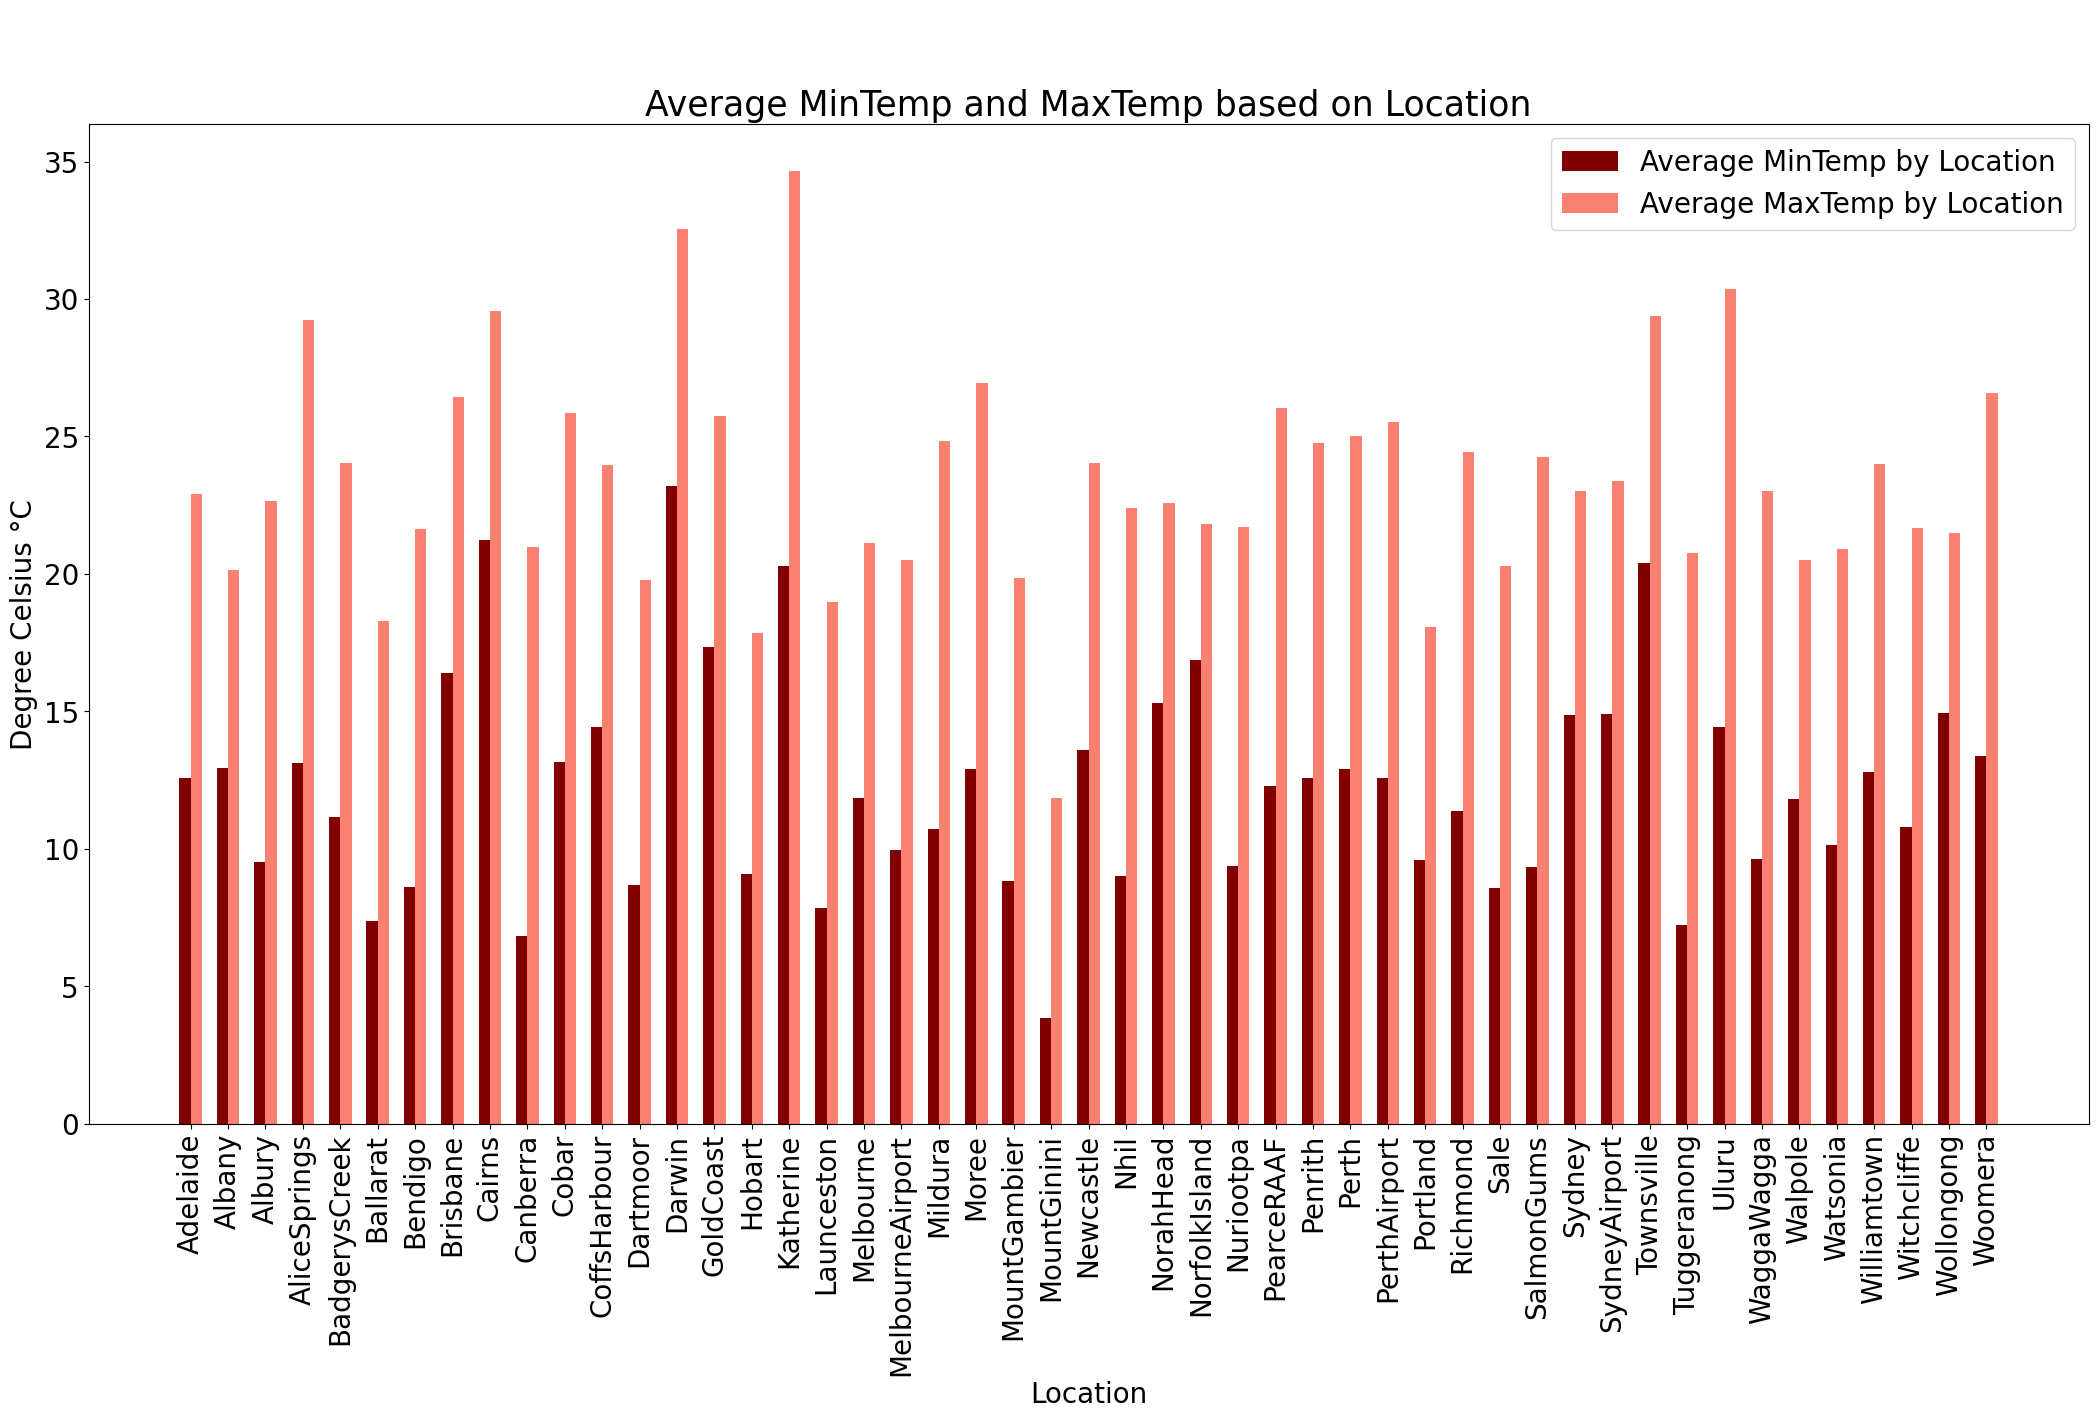

In [27]:
# MinTemp and MaxTemp of each location.
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (20,10)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

w = 0.3

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
# To set the font size for x-axis tick labels.
ax.set_xticklabels(loc, rotation=90, fontsize=20) 

plt.xlabel('Location', fontsize=20)
plt.ylabel('Degree Celsius °C', fontsize=20)
plt.xticks(fontsize=20)  # To increase fontsize for x-axis labels.
plt.yticks(fontsize=20)  # To increase fontsize for y-axis labels.
plt.title('\n\nAverage MinTemp and MaxTemp based on Location', fontsize=25)
plt.legend(fontsize=20)

<b>Fourth Visualization: <br><br> I analyzed the distribution of rainfall across different months.</b>

<b>First, I converted the Date column to a datetime format to extract the year and month information. </b>

<b>Then, I created a new DataFrame specifically focusing on the Year, Month, and Rainfall columns. </b>

<b>Next, I group the data by month and aggregate the total rainfall for each month. The resulting bar plot illustrates the distribution of rainfall in millimeters (mm) for each month, with each bar representing a specific month. </b>

<b>The pink bars provided a clear visual representation of the monthly variation in rainfall, allowing me to identify patterns and trends throughout the year. </b>

<b>This analysis could be valuable for understanding the seasonality of rainfall, which is essential for various applications, including agricultural planning and water resource management. </b>

<b>Noted Observation:</b>
<b><li>The highest rainfall, exceeding 35,000 millimeters, happens in the month of March.</li></b>
<b><li>Months like January, February, and June also witness rainfall, nearly reaching 35,000 millimeters.</li></b>
<b><li>The least amount of rainfall is recorded in October, followed by September as the month with the second-lowest rainfall.</li></b>

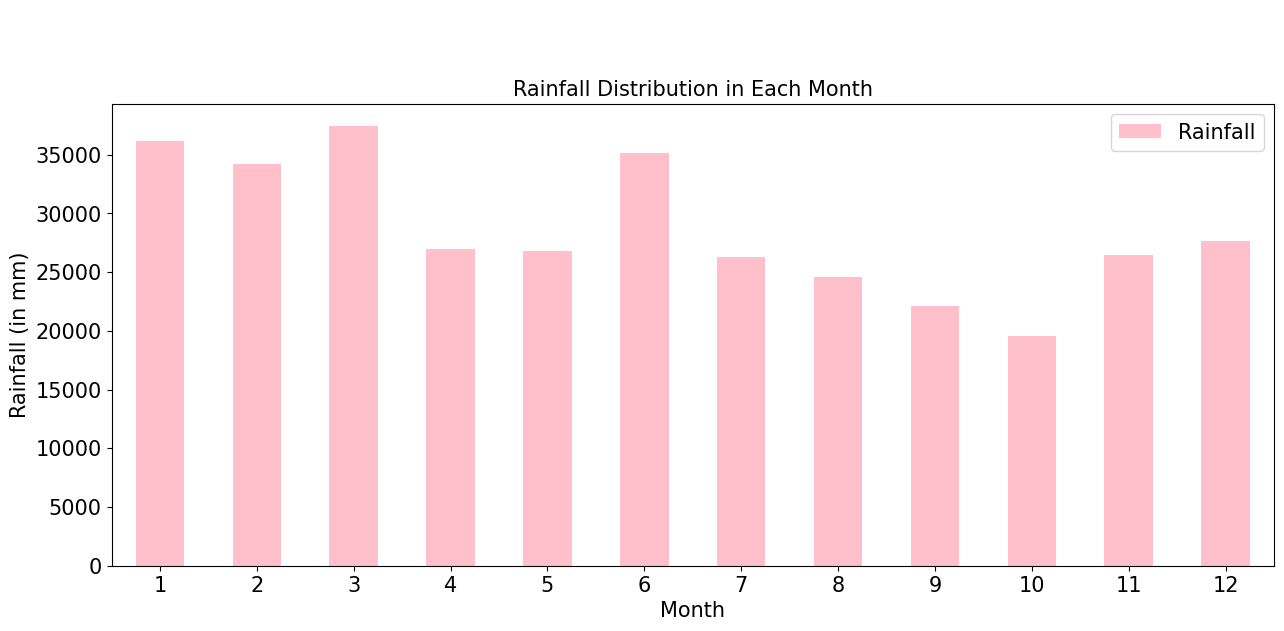

In [28]:
# To convert the Date column to datetime type.
df['Date'] = pd.to_datetime(df['Date'])

# To extract the year and month from the Date column.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# To create a new DataFrame for rainfall by year and month.
rainfall_df = df[['Year', 'Month', 'Rainfall']]

# To group and aggregate by month.
monthly_rainfall = rainfall_df.groupby('Month')['Rainfall'].sum()

# To create a bar plot for rainfall distribution by month.
plt.figure(figsize=(15, 6))
ax = monthly_rainfall.plot(kind='bar', color='pink')
plt.title('\n\n\nRainfall Distribution in Each Month', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rainfall (in mm)', fontsize=15)
plt.xticks(fontsize=15)  # To increase fontsize for x-axis labels.
plt.yticks(fontsize=15)  # To increase fontsize for y-axis labels.
plt.xticks(rotation=0)

# To add a legend.
ax.legend(['Rainfall'], fontsize=15) # To increase fontsize for the legend.

plt.show()

<b>Fifth Visualization: <br><br>I have extracted and analyzed the distribution of rainfall over the years. </b>
    
<b>To begin, I extracted the year from the Date column and created a new Year column, which allowed me to group and aggregate the data by year. </b>

<b>The resulting bar plot shows the total amount of rainfall (in millimeters) for each year, represented by the purple colored
 bars.</b>

<b>The chart provides a clear visual representation of how rainfall has varied over time, allowing me to identify trends or patterns in the data. </b>

<b>This analysis can be valuable for understanding long-term rainfall patterns and making informed decisions related to weather and climate changes. </b>

<b>Noted Observation:</b>
<b><li>The year 2010 stands out with the highest recorded rainfall, exceeding 40,000 millimeters, followed by substantial rainfall in years 2011 and 2016.</b></li>
<b><li>The year 2007 saw the lowest recorded rainfall, with less than 200 millimeters. </b></li>
<b><li>Followed by years 2008 and 2017, which experienced notable dry conditions, with rainfall exceeding 20,000 millimeters.</b></li>
<b><li>These years stand out as having significantly lower rainfall compared to others in the dataset.</b></li>

<Figure size 1500x200 with 0 Axes>

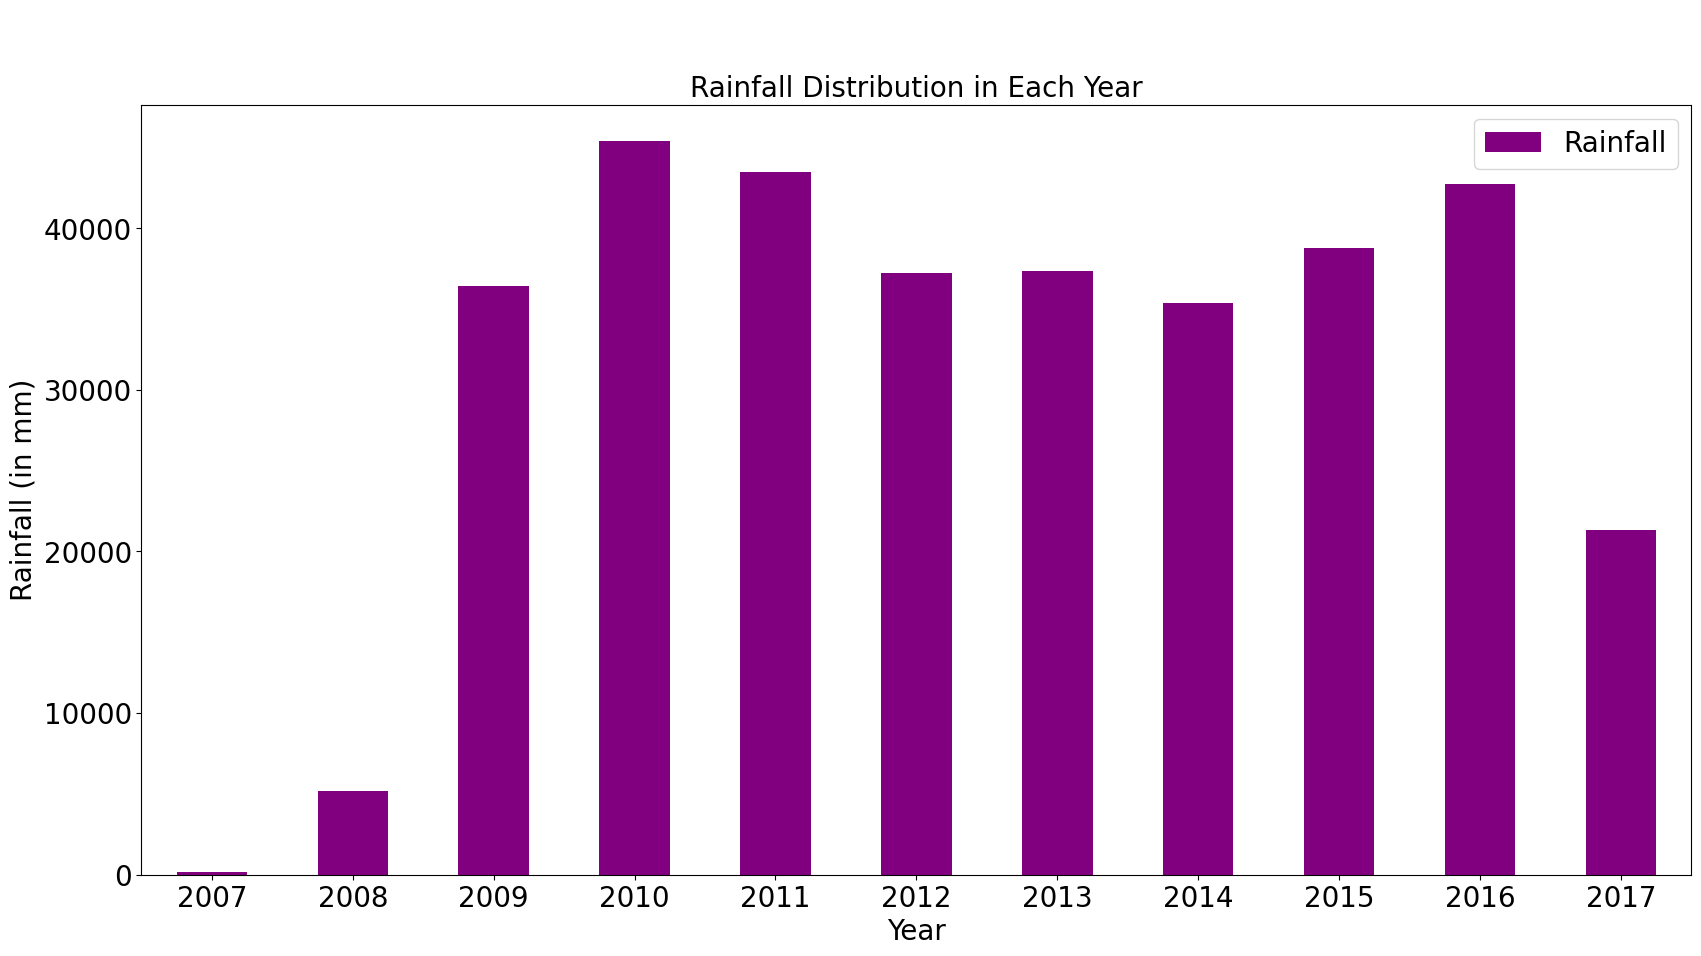

In [29]:
# To extract the year from the Date column and create a new Year column.
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Rainfall distribution in each year.
plt.figure(figsize=(15, 2))  # To increase figure size for better visibility.
a = df.groupby('Year').agg({'Rainfall': 'sum'})
a.plot(kind='bar', color='purple')
plt.title('\n\nRainfall Distribution in Each Year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)
plt.xticks(fontsize=20)  # To increase fontsize for x-axis labels.
plt.yticks(fontsize=20)  # To increase fontsize for y-axis labels.
plt.legend(fontsize=20)  # To increase fontsize for the legend.

plt.show()

<b>Sixth Visualization: <br><br>I am looking at the directions from which the wind blows at different times of the day: when the strongest gust of wind happens (WindGustDir), in the morning (WindDir9am), and in the afternoon (WindDir3pm). <br><br>I wanted to see if these wind directions have anything to do with whether it will rain tomorrow or otherwise.</b>

<b>Each of the three pictures shows a different wind direction. <br><br>The bars in the pictures have two colors: one for when the weather predicts rain tomorrow (RainTomorrow = Yes), and another color for when it does not predict rain (RainTomorrow = No). </b>

<b>This helps me see if there is a connection between the wind direction and the chance of rain tomorrow. <br><br>For example, I can check if certain wind directions make it more likely or less likely to have rain tomorrow. </b>

<b>The first picture has a legend (a small guide) to show which color means what.</b>

<b>This kind of information can be useful for people who predict the weather because it helps them to understand how wind patterns relate to rain forecasts.</b>

<b>Noted Observation:</b>
<b><li>I see that for the Wind Gust Direction, the most common direction is West, which occurs in nearly 17,500 records.</li></b>
<b><li>When looking at the Wind Direction at 9AM, North is the most common direction, followed by North-West and East.</li></b>
<b><li>In the case of Wind Direction at 3PM, South-East is the most frequent direction.</li></b>

<b>After observing the visualization, this information helps me to understand which wind directions are most common in the dataset, which <br>could be important when it comes to predicting whether it will rain tomorrow or otherwise.</b><br>

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# To create a single figure with subplots.
fig, ax = plt.subplots(3, 1, figsize=(15, 25))

# To plot WindGustDir distribution with RainTomorrow as hue.
sns.countplot(data=df, x='WindGustDir', hue='RainTomorrow', palette='ocean', ax=ax[0])
ax[0].set_title("\n\nWind Gust Direction", fontsize=20)
ax[0].set_xlabel('WindGustDir', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(labelsize=16)  # Set the font size for tick labels.
ax[0].legend(loc='upper right', title='RainTomorrow', fontsize=14, title_fontsize='16')

# To plot WindDir9am distribution with RainTomorrow as hue.
sns.countplot(data=df, x='WindDir9am', hue='RainTomorrow', palette='magma_r', ax=ax[1])
ax[1].set_title("\n\nWind Direction at 9AM", fontsize=20)
ax[1].set_xlabel('WindDir9am', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(labelsize=16)  # Set the font size for tick labels.
ax[1].legend(loc='upper right', title='RainTomorrow', fontsize=14, title_fontsize='16')

# To plot WindDir3pm distribution with RainTomorrow as hue.
sns.countplot(data=df, x='WindDir3pm', hue='RainTomorrow', palette='BuGn_r', ax=ax[2])
ax[2].set_title("\n\nWind Direction at 3PM", fontsize=20)
ax[2].set_xlabel('WindDir3pm', fontsize=16)
ax[2].set_ylabel('Count', fontsize=16)
ax[2].tick_params(labelsize=16)  # Set the font size for tick labels.
ax[2].legend(loc='upper right', title='RainTomorrow', fontsize=14, title_fontsize='16')

# Adjust spacing between subplots to ensure no overlapping.
plt.tight_layout()

# Display the plots.
plt.show()

<b>Seventh Visualization: <br><br>I am examining the distribution of the WindGustSpeed variable. <br><br>The histogram shows how frequently different wind gust speeds occur in the dataset.</b>

<b>WindGustSpeed is represented on the x-axis, while the frequency of each speed is shown on the y-axis. The blue bars in the graph display the distribution.</b>

<b>From the visualization, I can see the pattern of wind gust speeds in the dataset. This information is valuable because it helps me understand the range and frequency of wind gusts, which can be crucial when assessing weather conditions and their potential impact on rainfall tomorrow. </b>

<b>It provides insights into the variability and intensity of wind gusts recorded in the dataset.</b>

<b>Noted Observation:</b>
<b><li>The graph shows the speed of wind gusts, which can be as slow as 0 kilometers per hour and reach almost 140 kilometers per hour.</li></b>
<b><li> Most of the recorded wind gusts fall within the range of 38 to 40 kilometers per hour, which is where I see the highest number of occurrences.</li></b>
<b><li>This information helps me to understand the typical speed of wind gusts and their variability in the dataset.</b></li>

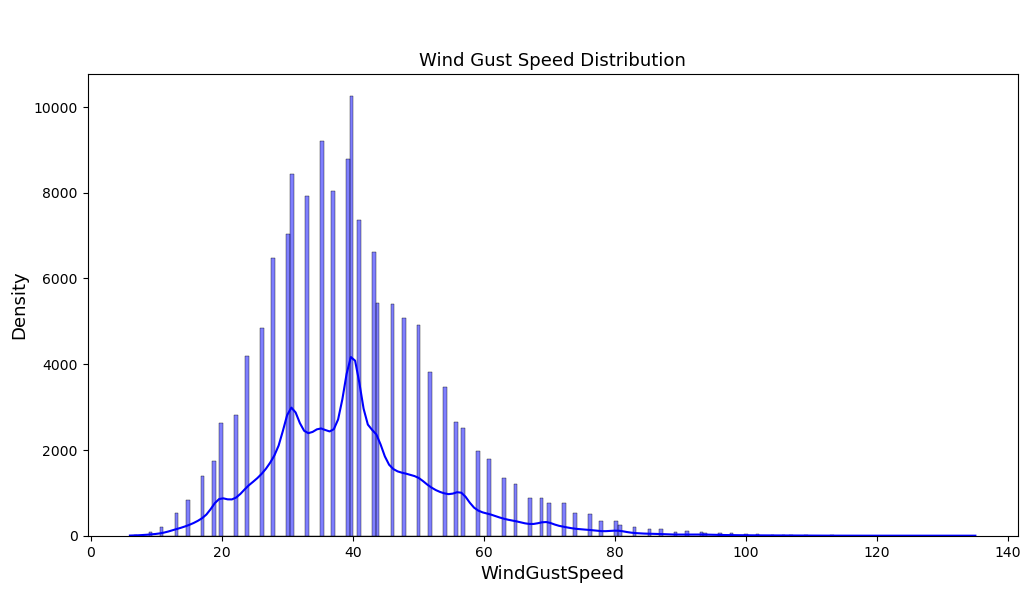

In [31]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress all warnings to ensure clean output.
warnings.filterwarnings("ignore")

# Distribution of WindGustSpeed.
plt.figure(figsize=(12, 6))
sns.histplot(df['WindGustSpeed'], kde=True, color='blue')

# Add a title to the graph.
plt.title("\n\nWind Gust Speed Distribution", fontsize=13)

# Set x and y labels with specified font size.
plt.xlabel('WindGustSpeed', fontsize=13)
plt.ylabel('Density', fontsize=13)

# Show the plot.
plt.show()

<b>Eighth Visualization: <br><br>I explored the distributions of various weather-related features.<br><br>Each plot represents the distribution of a specific attribute, such as wind speed, humidity, pressure, and temperature, at different <br>times during the day.</b>

<b>The histograms provide insights into the spread and concentration of these variables in the dataset.</b>

<b> For example, in the Wind Speed at 9AM and Wind Speed at 3PM plots, I can observe the frequency of wind speeds at around <br>these two different times. <br><br>Similarly, the other plots show the distributions of humidity, pressure, and temperature at different hours.</b>

<b>By analyzing these distributions, it can help everyone in understanding the typical weather conditions at specific times of the day, <br>which can be valuable for weather forecasting and climate analysis, in my point of view.</b>

<b>Noted Observation:</b>
<b><li>In the morning at 9am, the wind speed mostly stays between 10 to 20 km/hr, while in the afternoon at 3pm, it is slightly higher, <br>ranging from about 15 to 22 km/hr.</li></b>
<b><li>The humidity levels at 9am are commonly found between 60% to 80%, while at 3pm, they vary between 40% to 70%.</li></b>
<b><li>The pressure readings at 9am tend to be around 1015 to 1018 hpa, and by 3pm, they fall between 1015 to 1017 hpa.</b></li>
<b><li>The temperature at 9am typically falls in the range of 16 to 18 Degree Celsius, whereas at 3pm, it is warmer, <br>ranging from about 21 to 23 Degree Celsius.</li></b>

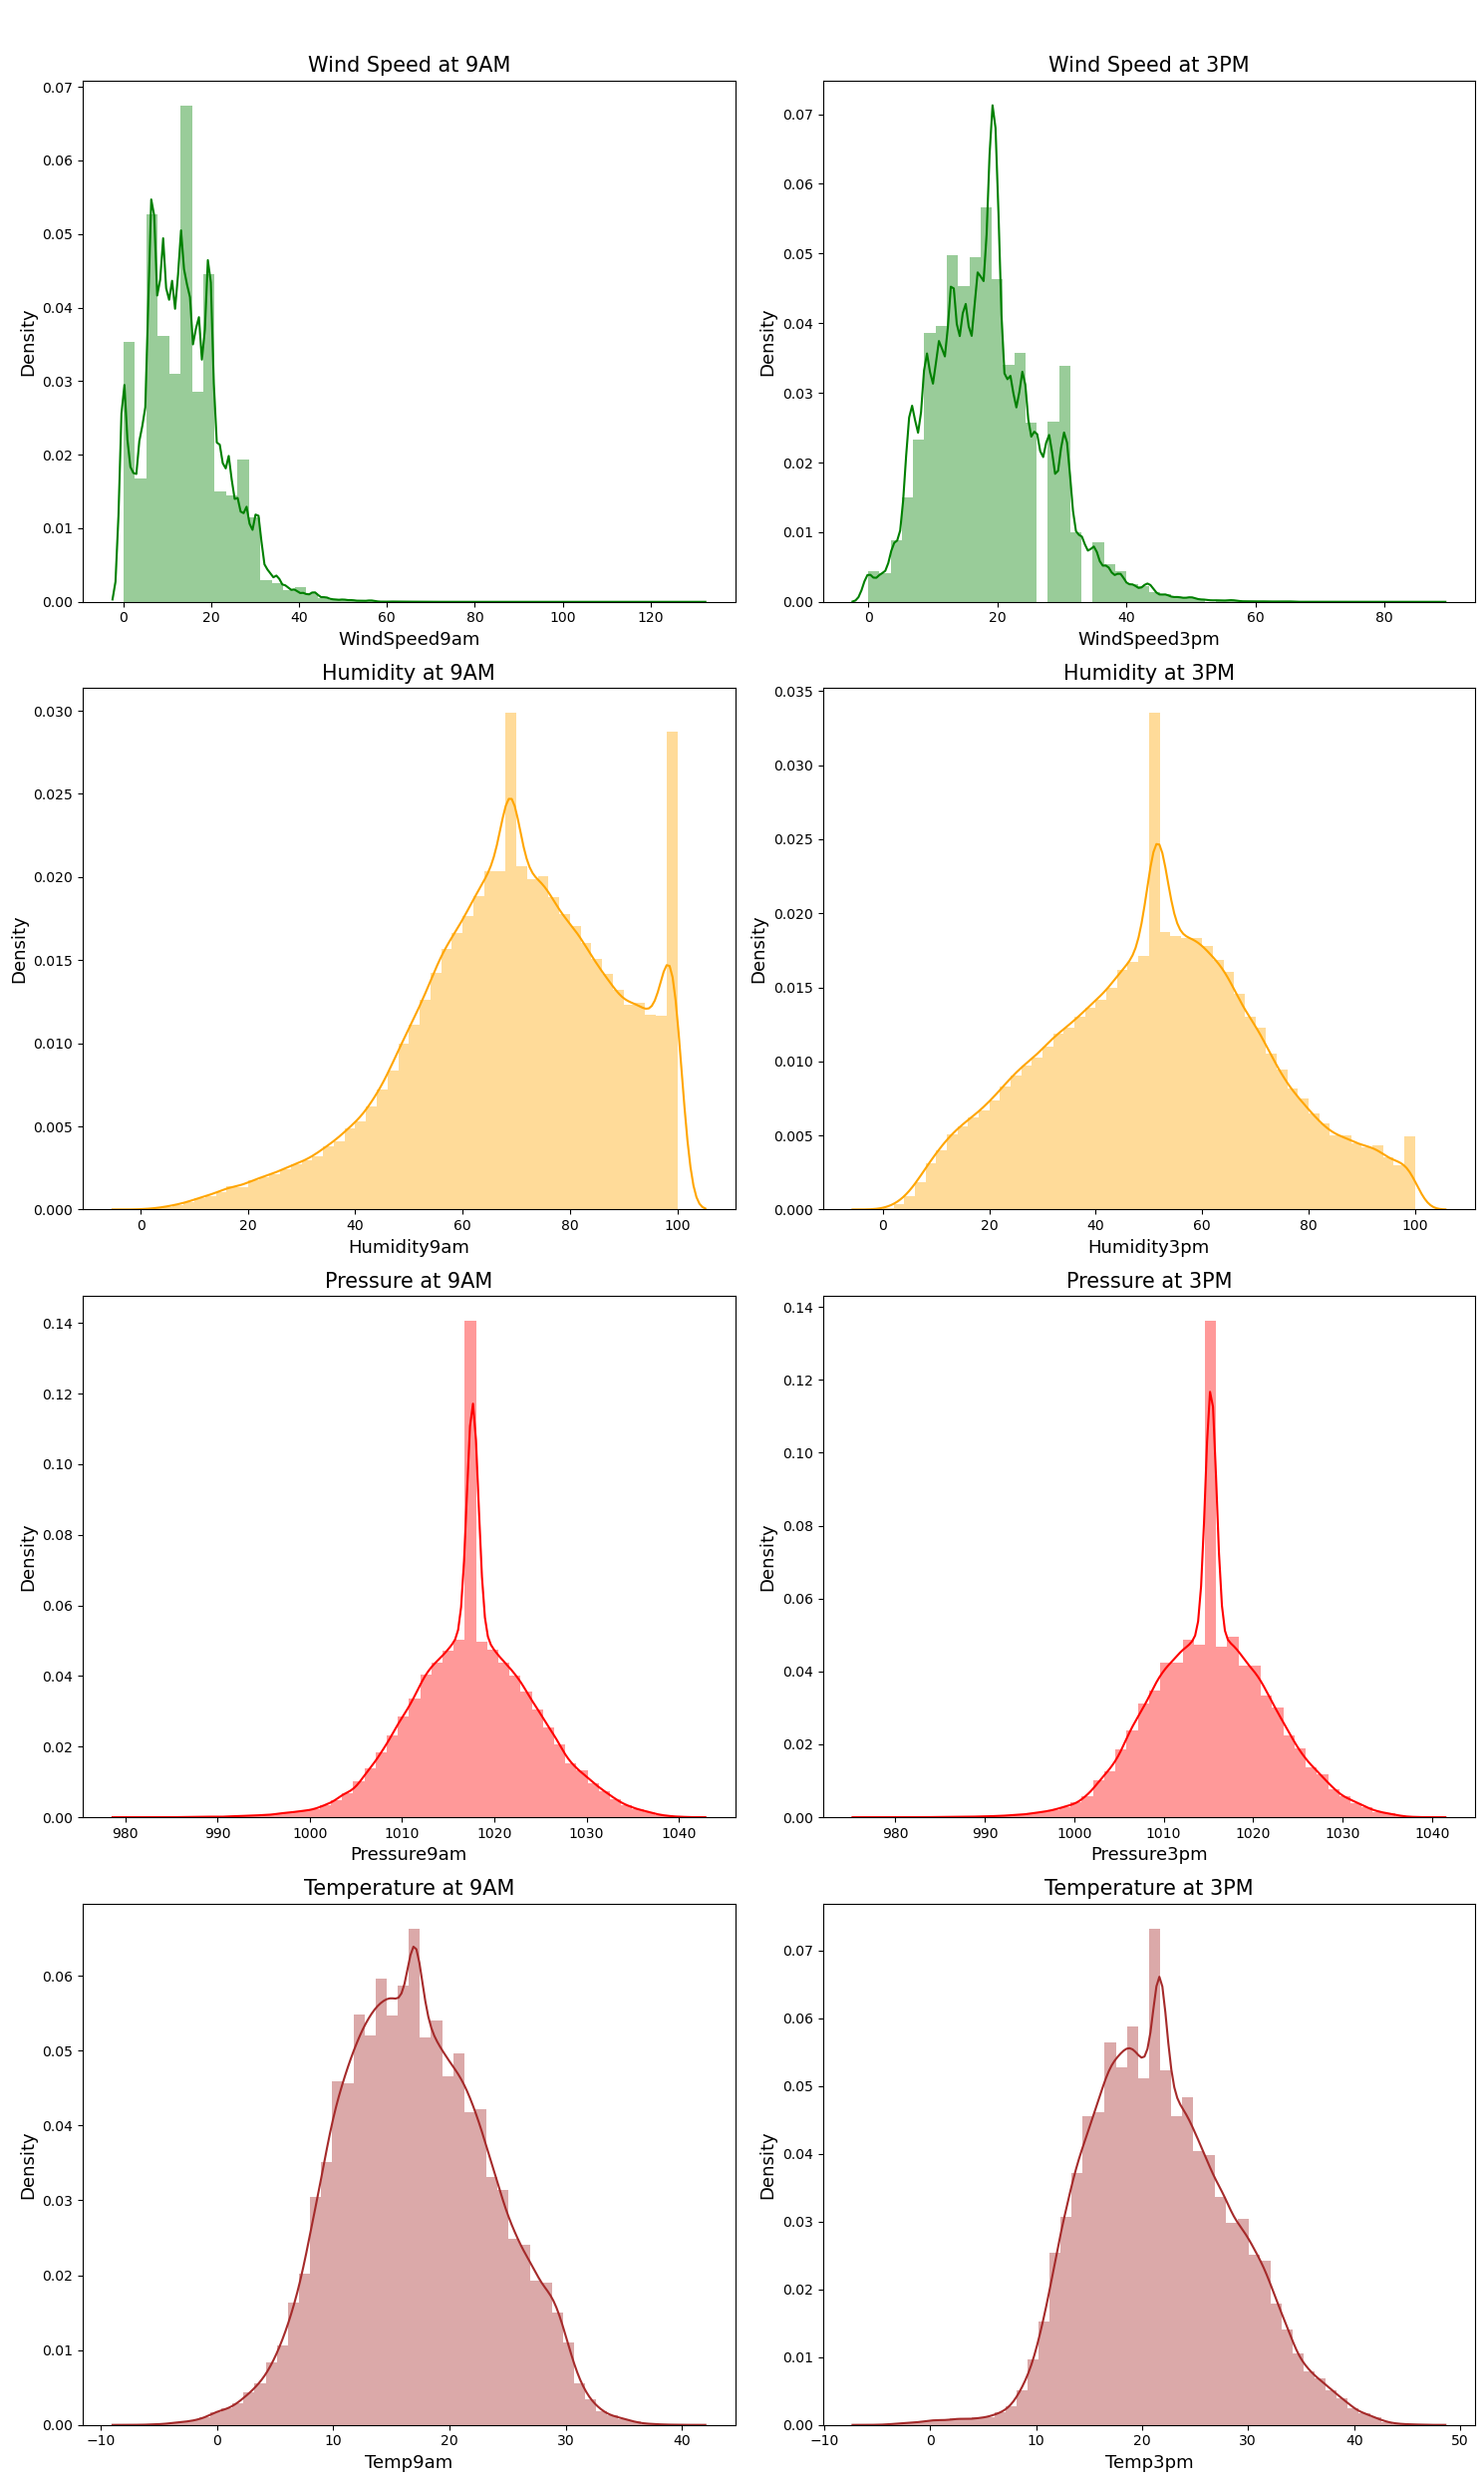

In [32]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm.
fig, ax = plt.subplots(4, 2, figsize=(15, 25))

# WindSpeed9am.
sns.distplot(df['WindSpeed9am'], ax=ax[0, 0], color='green')
ax[0, 0].set_title("\n\nWind Speed at 9AM", fontsize=15)
ax[0, 0].set_xlabel('WindSpeed9am', fontsize=13)
ax[0, 0].set_ylabel('Density', fontsize=13)

# WindSpeed3pm.
sns.distplot(df['WindSpeed3pm'], ax=ax[0, 1], color='green')
ax[0, 1].set_title("Wind Speed at 3PM", fontsize=15)
ax[0, 1].set_xlabel('WindSpeed3pm', fontsize=13)
ax[0, 1].set_ylabel('Density', fontsize=13)

# Humidity9am.
sns.distplot(df['Humidity9am'], ax=ax[1, 0], color='orange')
ax[1, 0].set_title("Humidity at 9AM", fontsize=15)
ax[1, 0].set_xlabel('Humidity9am', fontsize=13)
ax[1, 0].set_ylabel('Density', fontsize=13)

# Humidity3pm.
sns.distplot(df['Humidity3pm'], ax=ax[1, 1], color='orange')
ax[1, 1].set_title("Humidity at 3PM", fontsize=15)
ax[1, 1].set_xlabel('Humidity3pm', fontsize=13)
ax[1, 1].set_ylabel('Density', fontsize=13)

# Pressure9am.
sns.distplot(df['Pressure9am'], ax=ax[2, 0], color='red')
ax[2, 0].set_title("Pressure at 9AM", fontsize=15)
ax[2, 0].set_xlabel('Pressure9am', fontsize=13)
ax[2, 0].set_ylabel('Density', fontsize=13)

# Pressure3pm.
sns.distplot(df['Pressure3pm'], ax=ax[2, 1], color='red')
ax[2, 1].set_title("Pressure at 3PM", fontsize=15)
ax[2, 1].set_xlabel('Pressure3pm', fontsize=13)
ax[2, 1].set_ylabel('Density', fontsize=13)

# Temp9am.
sns.distplot(df['Temp9am'], ax=ax[3, 0], color='brown')
ax[3, 0].set_title("Temperature at 9AM", fontsize=15)
ax[3, 0].set_xlabel('Temp9am', fontsize=13)
ax[3, 0].set_ylabel('Density', fontsize=13)

# Temp3pm.
sns.distplot(df['Temp3pm'], ax=ax[3, 1], color='brown')
ax[3, 1].set_title("Temperature at 3PM", fontsize=15)
ax[3, 1].set_xlabel('Temp3pm', fontsize=13)
ax[3, 1].set_ylabel('Density', fontsize=13)

# To suppress all warnings.
warnings.filterwarnings("ignore")

# Adjust layout to prevent overlap.
plt.tight_layout()
plt.show()

<b>Ninth Visualization: <br><br>In the scatterplot, I am visualizing the relationship between minimum temperature (MinTemp) and maximum temperature (MaxTemp) with a <br>color-coded representation for the target variable RainTomorrow.</b>

<b>Each point on the plot represents a day's weather data, with MinTemp on the x-axis and MaxTemp on the y-axis.</b>

<b>The points are color-coded based on whether it will rain the next day (RainTomorrow: Yes or No).<br><br>For example, I can check if rainy days (Yes) tend to happen more often when the temperature is within a certain range or if temperature alone provides a strong clue about whether it will rain the next day or not.</b>

<b>This visualization can be useful for understanding how temperature features relate to predicting rain, which is valuable for weather forecasting and decision-making.</b><br>

<b>Noted Observation:</b>
<b><li>By looking at the relationship between maximum and minimum temperatures, I can notice that on days with high temperatures, it is more likely that it will not rain the next day.</li></b>

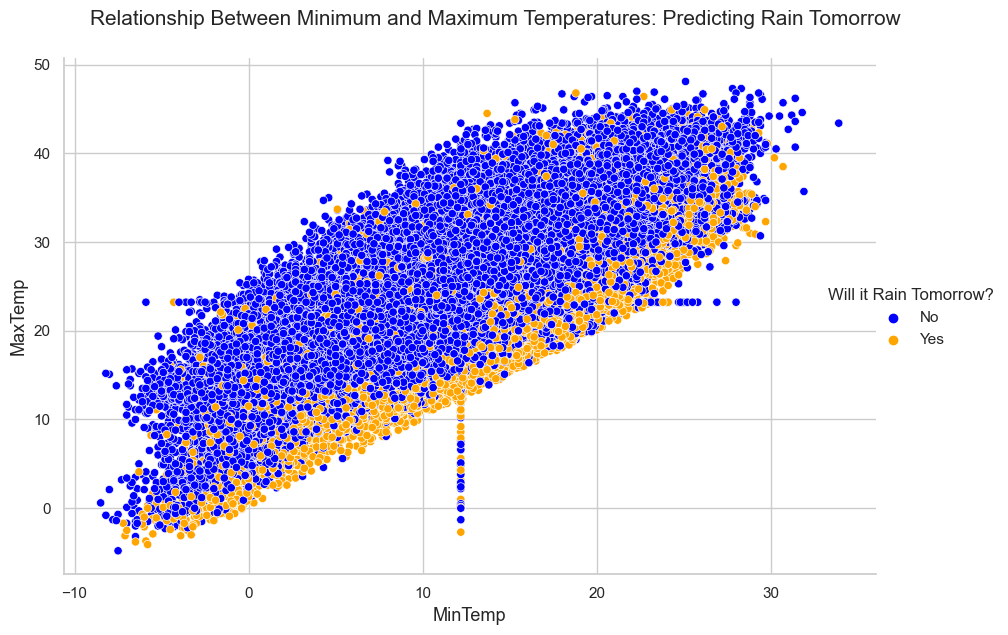

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to explicitly define colors.
palette = {"Yes": "orange", "No": "blue"}

# Ninth Visualization: Scatterplot of MinTemp and MaxTemp with RainTomorrow indication.
sns.set_theme(style="whitegrid")
scatter_plot = sns.relplot(
    x='MinTemp',
    y='MaxTemp',
    hue='RainTomorrow',
    data=df,
    palette=palette,
    height=6,
    aspect=1.5
)

# Adding title and axis labels.
scatter_plot.fig.suptitle('Relationship Between Minimum and Maximum Temperatures: Predicting Rain Tomorrow', fontsize=15, y=1.05)
scatter_plot.set_axis_labels('MinTemp', 'MaxTemp', fontsize=13)

# Customize legend title.
scatter_plot._legend.set_title('Will it Rain Tomorrow?')

# Show plot
plt.show()

<b>Tenth Visualization: <br><br>I created a scatter plot using Seaborn to explore the relationship between the number of hours of sunshine (Sunshine) and the maximum temperature (MaxTemp), considering the RainTomorrow variable as the hue.</b>

<b>In this plot, each point represents a day in the dataset. The x-axis shows the amount of sunshine, the y-axis represents the maximum temperature, and the points are color-coded based on whether it will rain tomorrow (RainTomorrow: Yes or No).</b><br><br>
<b>Noted Observation:</b>
<b><li>By looking at the correlation between the maximum temperature (MaxTemp) and the amount of sunshine (Sunshine), I noticed that on days with high temperatures and plenty of sunshine, it is more likely that it will not rain the next day. This means that on sunny and hot days, rain is less common.</li></b>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette.
palette = {"Yes": "orange", "No": "blue"}

# Create the scatter plot to explore the relationship between Sunshine and MaxTemp.
sns.set_theme(style="whitegrid")
scatter_plot = sns.relplot(
    x='Sunshine',
    y='MaxTemp',
    hue='RainTomorrow',
    data=df,
    palette=palette,
    height=6,
    aspect=1.5
)

# Adding title and axis labels with specified font sizes.
scatter_plot.fig.suptitle('Relationship Between Sunshine and MaxTemp Impact on Rain Tomorrow', fontsize=15, y=1.05)
scatter_plot.set_axis_labels('Sunshine', 'MaxTemp', fontsize=13)

# Customize legend title.
scatter_plot._legend.set_title('Will it Rain Tomorrow?')

# Show plot
plt.show()

<b>The bar chart presented here visualizes the relationship between Rain Today and Rain Tomorrow. It provides insights into how often the occurrence of rain today corresponds to rain or no rain tomorrow. The chart is divided into two bars, representing Yes and No for both Rain Today and Rain Tomorrow.</b>

<b>Each bar's height represents the count of occurrences, and they are not stacked, allowing for a clear comparison between the two categories. This chart will be useful in understanding the correlation between these two weather conditions and assist in making predictions about whether it will rain tomorrow based on today's weather.</b><br>

<b>Noted Observation:</b>
<b><li>For most of the records, there was no rain on both the current day and the next day.</li></b>
<b><li>In almost 20,000 records, it did not rain on the current day. However, in some cases (around 3,000 records), it did rain the next day.</li></b>
<b><li>Similarly, in nearly 20,000 records, it rained on the current day, but in about 5,000 records, it did not rain the next day.</li></b>

<Figure size 1000x600 with 0 Axes>

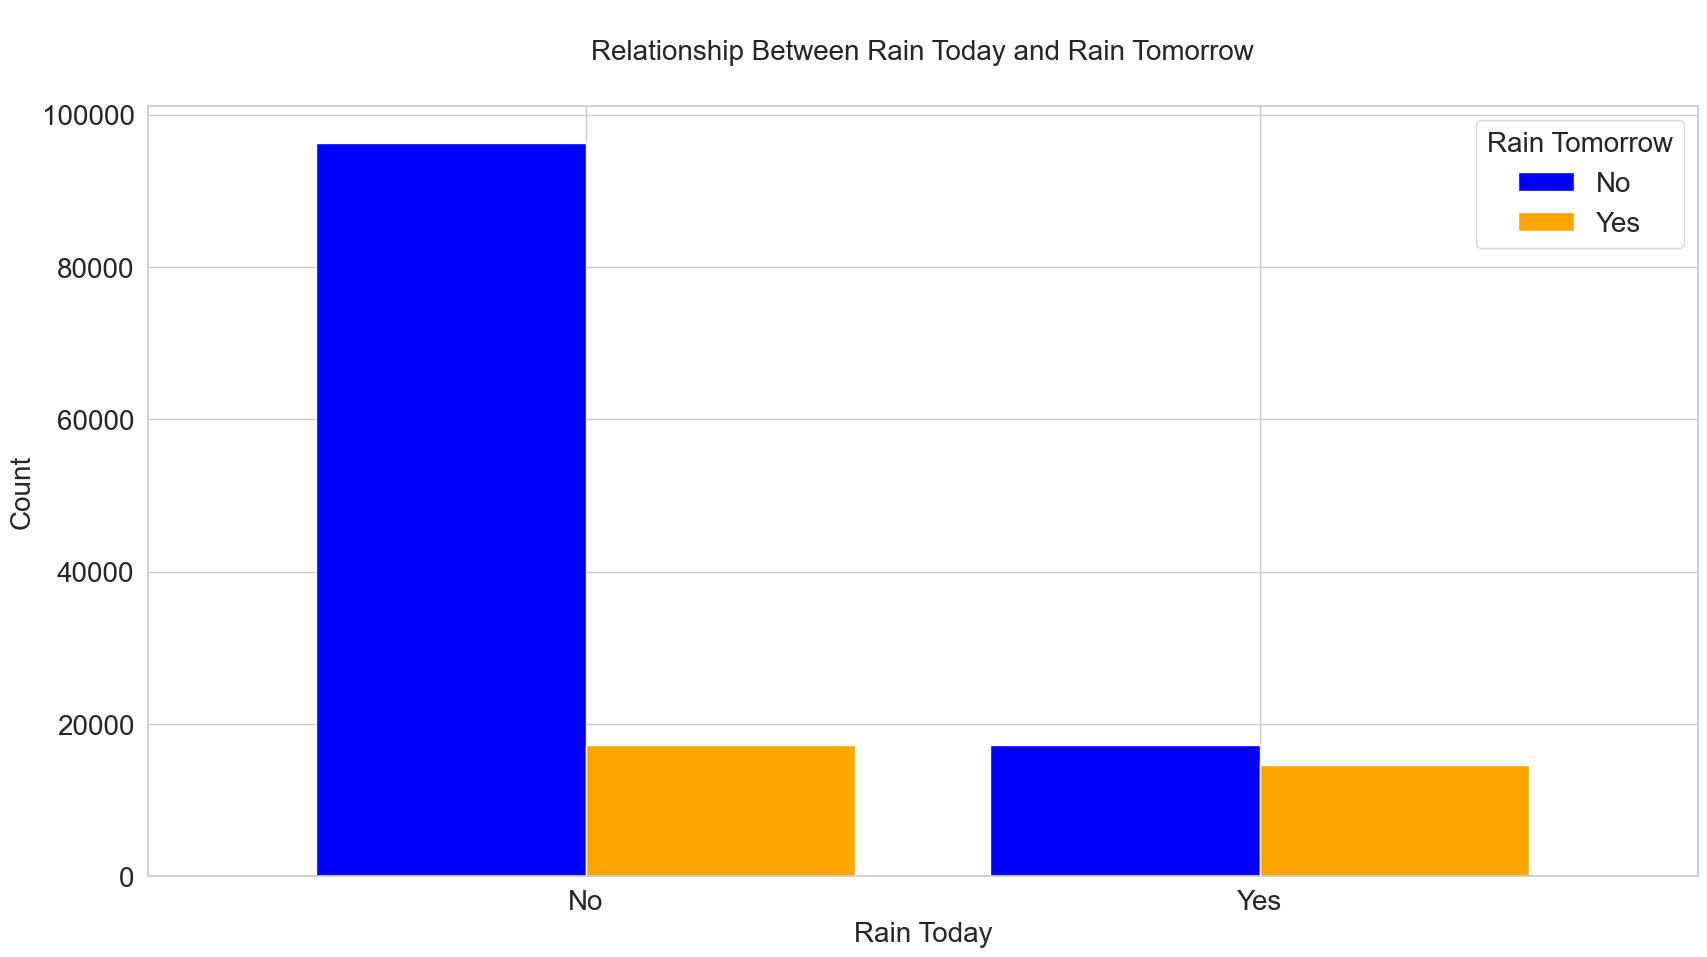

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab for RainToday and RainTomorrow.
type_plt = pd.crosstab(df['RainToday'], df['RainTomorrow'])

# Set figure size and plot the bar chart.
plt.figure(figsize=(10, 6))
type_plt.plot(kind='bar', stacked=False, width=0.8, color=['blue', 'orange'])

# Set labels and title.
plt.xlabel('Rain Today', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('\nRelationship Between Rain Today and Rain Tomorrow', fontsize=20, y=1.05)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Rain Tomorrow', fontsize=20, title_fontsize=20)

# Show the plot.
plt.show()

## Handling Class Imbalance with SMOTE
In this section, I <b> have addressed</b> the <b>class imbalance issue</b> in the <b>target variable "RainTomorrow"</b> to <b>enhance the performance of the machine learning models</b> at the same time.

In [36]:
# To import the necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

<b>Visualizing Class Distribution:</b><br>
<li><b>I start by visualizing the distribution of the target variable RainTomorrow to identify any imbalance. This helps me understand the dataset's class distribution.</li></b>

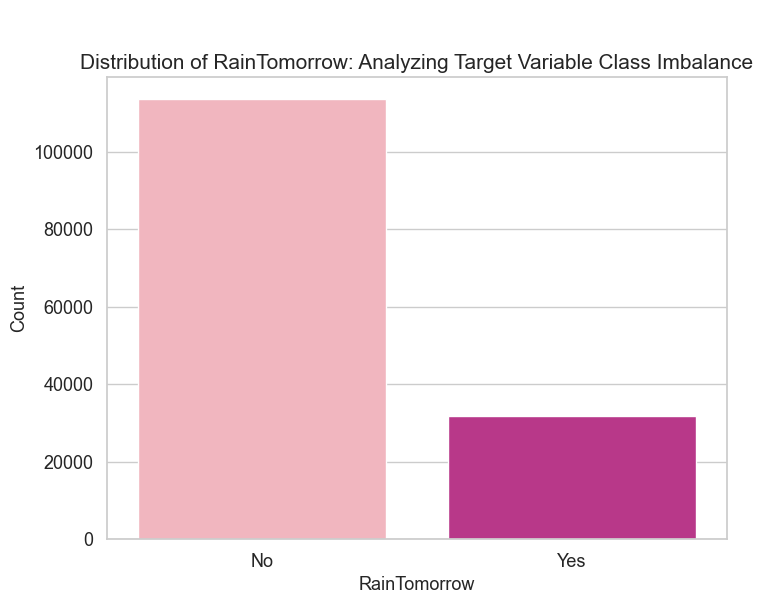

Class Distribution:
RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable "RainTomorrow".
plt.figure(figsize=(8, 6))
sns.set_theme(style='whitegrid')
sns.countplot(data=df, x='RainTomorrow', palette='RdPu')
plt.title('\n\nDistribution of RainTomorrow: Analyzing Target Variable Class Imbalance', fontsize=15)
plt.xlabel('RainTomorrow', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Calculate the class distribution.
class_distribution = df['RainTomorrow'].value_counts()
print("Class Distribution:")
print(class_distribution)

<b>Encoding Categorical Variables:</b><br>
<li><b>I used label encoding for categorical variables such as 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', and 'RainTomorrow'.</li></b>
<li><b>This transforms categorical data into a numerical format, making it suitable for machine learning algorithms.</li></b>

In [38]:
# Encoding categorical variables
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

# List of categorical labels to be encoded
labels = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in labels:
    label_encoder(i)

<b>Date Conversion:</b><br>
<li><b>I converted the 'Date' column into ordinal values to make it compatible with the models.</li></b>

In [39]:
# To convert datatype of Date in DataFrame.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# To convert the datetime values to ordinal values.
df['Date'] = df['Date'].apply(lambda x: x.toordinal())

<b>Feature Matrix and Target Variable:</b><br>
<li><b>I defined the feature matrix (X) and target variable (y).</li></b>
<li><b>Where X contains all the features except 'RainTomorrow,' and y contains the target variable 'RainTomorrow.'</b></li>

In [40]:
# To define feature matrix (X) and target variable (y).
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

<b>Train-Test Split:</b><br>
<li><b>I split the dataset into training and testing sets to evaluate model performance.</li></b>

In [41]:
# To split the dataset into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b>Handling Class Imbalance:</b><br>
<li><b>I addressed the class imbalance issue by applying the Synthetic Minority Over-sampling Technique (SMOTE).</li></b>
<li><b>This technique generates synthetic samples for the minority class ('Yes' for "RainTomorrow") to balance the dataset.</b></li>

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# To check the class distribution before applying SMOTE.
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({0: 90791, 1: 25577})


<b>Post-SMOTE Class Distribution:</b><br>
<li><b>I checked the class distribution again after applying SMOTE to ensure that both classes are adequately represented in the training data.</li></b>

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# To apply SMOTE to balance the dataset.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# To check the class distribution after applying SMOTE.
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 90791, 1: 90791})


<b>Shapes of Sets:</b><br>
<li><b>Finally, I print the shapes of the training and testing sets for reference.</li></b>

In [44]:
# To print the shapes of the training and testing sets.
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (116368, 24)
X_test: (29092, 24)
y_train: (116368,)
y_test: (29092,)


## Model Evaluation and Analysis
In this section, I will <b>evaluate the machine learning models</b> for <b>upcoming rain prediction using a range of performance metrics</b>.<br><br> These <b>metrics will include precision, recall, F1-score, accuracy score (CA), AUC-ROC, and Matthews Correlation Coefficient (MCC)</b>. <br>




XGBoost - Classification Report:
                                       precision    recall  f1-score   support

No. It will not be raining tomorrow.       0.88      0.95      0.91    113583
   Yes. It will be raining tomorrow.       0.74      0.56      0.64     31877

                            accuracy                           0.86    145460
                           macro avg       0.81      0.75      0.78    145460
                        weighted avg       0.85      0.86      0.85    145460

XGBoost - Accuracy Score (CA): 0.86
XGBoost - ROC-AUC: 0.89
XGBoost - Matthews Correlation Coefficient (MCC): 0.56


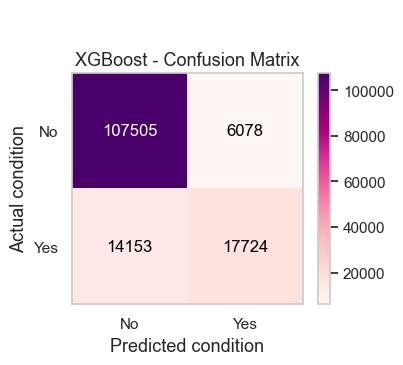

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Initialize and configure the XGBoost model with regularization (L1 and L2).
xgboost_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    reg_alpha=1,  # L1 regularization (Lasso)
    reg_lambda=1,  # L2 regularization (Ridge)
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.3,
    n_estimators=100,
    random_state=42
)

# Fit the XGBoost model to the training data.
xgboost_model.fit(X_train, y_train)

# Perform stratified k-fold cross-validation.
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get cross-validated predictions.
y_pred_cv = cross_val_predict(xgboost_model, X, y, cv=stratified_kfold, method='predict_proba')

# Extract probabilities of the positive class (class 1).
y_pred_proba = y_pred_cv[:, 1]

# Make binary predictions based on probability threshold.
threshold = 0.5
y_pred_binary_xgboost = np.where(y_pred_proba >= threshold, 1, 0)

# Calculate MCC for XGBoost.
mcc_xgboost = matthews_corrcoef(y, y_pred_binary_xgboost)

# Create a colored confusion matrix for XGBoost with cross-validation.
confusion_xgboost_cv = confusion_matrix(y, y_pred_binary_xgboost, labels=[0, 1])

# Generate the classification report and include AUC, CA, and MCC for XGBoost.
report_xgboost_cv = classification_report(y, y_pred_binary_xgboost, target_names=["No. It will not be raining tomorrow.", "Yes. It will be raining tomorrow."])
report_xgboost_cv += f'\nXGBoost - Accuracy Score (CA): {accuracy_score(y, y_pred_binary_xgboost):.2f}'
report_xgboost_cv += f'\nXGBoost - ROC-AUC: {roc_auc_score(y, y_pred_proba):.2f}'
report_xgboost_cv += f'\nXGBoost - Matthews Correlation Coefficient (MCC): {mcc_xgboost:.2f}'

# Print the classification report for XGBoost.
print("\n\n\nXGBoost - Classification Report:\n", report_xgboost_cv)

# Create a confusion matrix for XGBoost using matplotlib.
fig, ax = plt.subplots(figsize=(4, 3))
cax = ax.imshow(confusion_xgboost_cv, interpolation='nearest', cmap='RdPu')
fig.colorbar(cax)

# Remove the grid inside the confusion matrix.
ax.grid(False)

ax.set_xticks(np.arange(len(["No", "Yes"])))
ax.set_yticks(np.arange(len(["No", "Yes"])))
ax.set_xticklabels(["No", "Yes"])
ax.set_yticklabels(["No", "Yes"])
ax.set_xlabel('Predicted condition', fontsize=13)
ax.set_ylabel('Actual condition', fontsize=13)
ax.set_title('\n\nXGBoost - Confusion Matrix', fontsize=13)

# Change text color based on the background color.
norm = plt.Normalize(confusion_xgboost_cv.min(), confusion_xgboost_cv.max())
for (i, j), val in np.ndenumerate(confusion_xgboost_cv):
    color = 'white' if norm(val) > 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=color)

plt.show()



LightGBM - Classification Report:
                                       precision    recall  f1-score   support

No. It will not be raining tomorrow.       0.87      0.95      0.91    113583
   Yes. It will be raining tomorrow.       0.75      0.51      0.60     31877

                            accuracy                           0.85    145460
                           macro avg       0.81      0.73      0.76    145460
                        weighted avg       0.85      0.85      0.84    145460

LightGBM - Accuracy Score (CA): 0.85
LightGBM - ROC-AUC: 0.88
LightGBM - Matthews Correlation Coefficient (MCC): 0.53


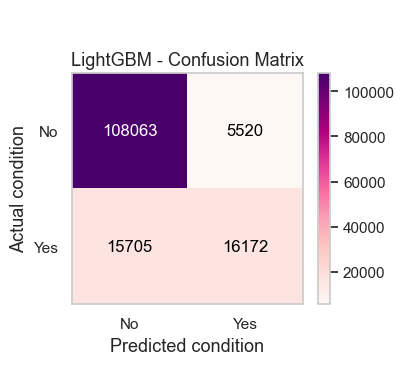

In [46]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# To initialize and train the LightGBM model with handling overfitting.
lgbm_model = LGBMClassifier(
    objective='binary',
    n_estimators=100,
    num_leaves=31,
    learning_rate=0.05,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    min_child_weight=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42,
    verbose=-1
)

# To fit the LightGBM model to the training data.
lgbm_model.fit(X_train, y_train)

# To perform stratified k-fold cross-validation for LightGBM.
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# To get cross-validated predictions for LightGBM.
y_pred_cv = cross_val_predict(lgbm_model, X, y, cv=stratified_kfold, method='predict_proba')

# To extract probabilities of the positive class (class 1) for LightGBM.
y_pred_proba = y_pred_cv[:, 1]

# To make binary predictions based on the probability threshold for LightGBM.
y_pred_binary_lgbm = np.where(y_pred_proba >= threshold, 1, 0)

# To calculate MCC for LightGBM.
mcc_lgbm = matthews_corrcoef(y, y_pred_binary_lgbm)

# To create a smaller colored confusion matrix for LightGBM with cross-validation.
confusion_lgbm_cv = confusion_matrix(y, y_pred_binary_lgbm, labels=[0, 1])

# To generate the classification report for LightGBM and include CA, ROC-AUC, and MCC.
report_lgbm_cv = classification_report(y, y_pred_binary_lgbm, target_names=["No. It will not be raining tomorrow.", "Yes. It will be raining tomorrow."])
report_lgbm_cv += f'\nLightGBM - Accuracy Score (CA): {accuracy_score(y, y_pred_binary_lgbm):.2f}'
report_lgbm_cv += f'\nLightGBM - ROC-AUC: {roc_auc_score(y, y_pred_proba):.2f}'
report_lgbm_cv += f'\nLightGBM - Matthews Correlation Coefficient (MCC): {mcc_lgbm:.2f}'

# To print the classification report for LightGBM.
print("\n\nLightGBM - Classification Report:\n", report_lgbm_cv)


# To create a smaller colored confusion matrix for LightGBM.
plt.figure(figsize=(4, 3))
plt.imshow(confusion_lgbm_cv, interpolation='nearest', cmap='RdPu')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["No", "Yes"])
plt.yticks(tick_marks, ["No", "Yes"])
plt.xlabel('Predicted condition', fontsize=13)
plt.ylabel('Actual condition', fontsize=13)

# Add text annotations
for i in range(2):
    for j in range(2):
        color = 'white' if confusion_lgbm_cv[i, j] > confusion_lgbm_cv.max() / 2 else 'black'
        plt.text(j, i, confusion_lgbm_cv[i, j], ha='center', va='center', color=color)

plt.grid(False)  # Remove grid lines
plt.title('\n\nLightGBM - Confusion Matrix', fontsize=13)
plt.show()




Random Forest - Classification Report:
                                       precision    recall  f1-score   support

No. It will not be raining tomorrow.       0.86      0.96      0.91    113583
   Yes. It will be raining tomorrow.       0.77      0.44      0.56     31877

                            accuracy                           0.85    145460
                           macro avg       0.82      0.70      0.73    145460
                        weighted avg       0.84      0.85      0.83    145460

Random Forest - Accuracy Score (CA): 0.85
Random Forest - ROC-AUC: 0.70
Random Forest - Matthews Correlation Coefficient (MCC): 0.50



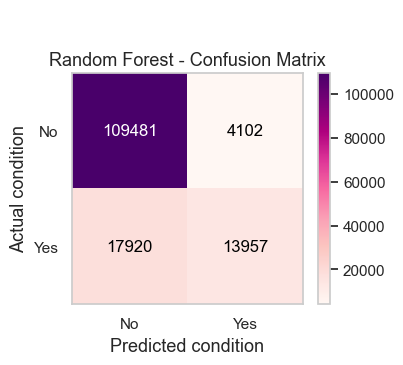

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialization and configuration of the RandomForest model to mitigate overfitting.
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, 
    random_state=42
)

# Fitting the RandomForest model to the training data.
random_forest_model.fit(X_train, y_train)

# Performing stratified k-fold cross-validation for the RandomForest model.
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Acquiring cross-validated predictions for the RandomForest model.
y_pred_cv_rf = cross_val_predict(random_forest_model, X, y, cv=stratified_kfold, method='predict')

# Calculation of the Matthews Correlation Coefficient for the RandomForest model.
mcc_rf = matthews_corrcoef(y, y_pred_cv_rf)

# Creation of a colored confusion matrix for the RandomForest model using cross-validation data.
confusion_rf_cv = confusion_matrix(y, y_pred_cv_rf, labels=[0, 1])

# Generation of the classification report for the RandomForest model, inclusive of CA, ROC-AUC, and MCC.
report_rf_cv = classification_report(y, y_pred_cv_rf, target_names=["No. It will not be raining tomorrow.", "Yes. It will be raining tomorrow."])
report_rf_cv += f'\nRandom Forest - Accuracy Score (CA): {accuracy_score(y, y_pred_cv_rf):.2f}'
report_rf_cv += f'\nRandom Forest - ROC-AUC: {roc_auc_score(y, y_pred_cv_rf):.2f}'
report_rf_cv += f'\nRandom Forest - Matthews Correlation Coefficient (MCC): {mcc_rf:.2f}\n'

# Outputting the classification report for the RandomForest model.
print("\n\n\nRandom Forest - Classification Report:\n", report_rf_cv)

# Visualization of the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(4, 3))
cax = ax.imshow(confusion_rf_cv, interpolation='nearest', cmap='RdPu')
fig.colorbar(cax)

# Remove the grid inside the confusion matrix.
ax.grid(False)

ax.set_xticks(np.arange(len(["No", "Yes"])))
ax.set_yticks(np.arange(len(["No", "Yes"])))
ax.set_xticklabels(["No", "Yes"])
ax.set_yticklabels(["No", "Yes"])
ax.set_xlabel('Predicted condition', fontsize=13)
ax.set_ylabel('Actual condition', fontsize=13)
ax.set_title('\n\nRandom Forest - Confusion Matrix', fontsize=13)

# Determine the color of the text based on the value in the cell.
max_val = np.max(confusion_rf_cv)
threshold_color = max_val / 2  # Define a threshold to switch text color.
for (i, j), val in np.ndenumerate(confusion_rf_cv):
    color = 'white' if val > threshold_color else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=color)

plt.show()

## Model Selection Based on ROC-AUC
To <b>evaluate and compare XGBoost, LightGBM, and RandomForest models, </b> <b>selecting the one</b> with the <b>highest ROC-AUC</b> for <b>rain prediction</b>.

A <b>higher ROC-AUC score indicates better performance in distinguishing between the positive and negative classes</b> in a <b>binary classification problem</b>. 

In this case, the <b>XGBoost model (XGBClassifier)</b> has the <b>highest ROC-AUC score of 0.89</b>, suggesting that <b>it is making better predictions</b> for <b>whether <br>it will rain tomorrow or otherwise as compared to the other models</b>. 

Therefore, <b>based on ROC-AUC alone</b>, the <b>XGBoost model</b> is the <b>preferred choice for rain prediction</b>.



ROC-AUC for XGBClassifier: 0.89


ROC-AUC for LGBMClassifier: 0.88


ROC-AUC for RandomForestClassifier: 0.87


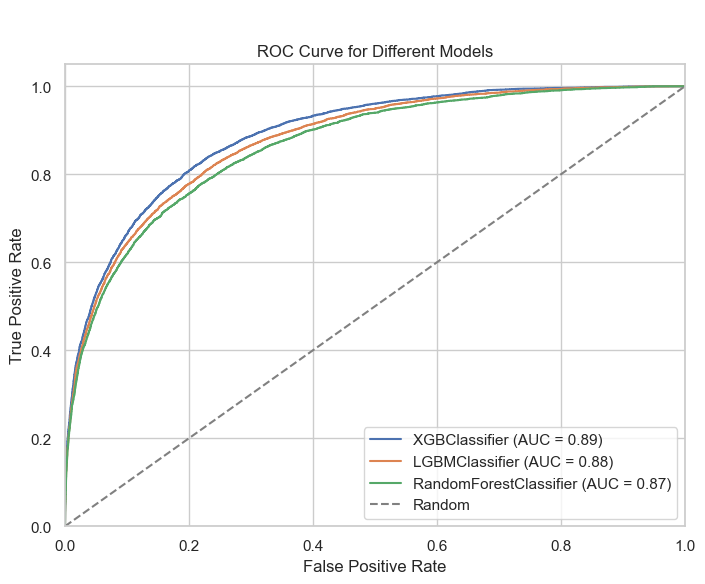

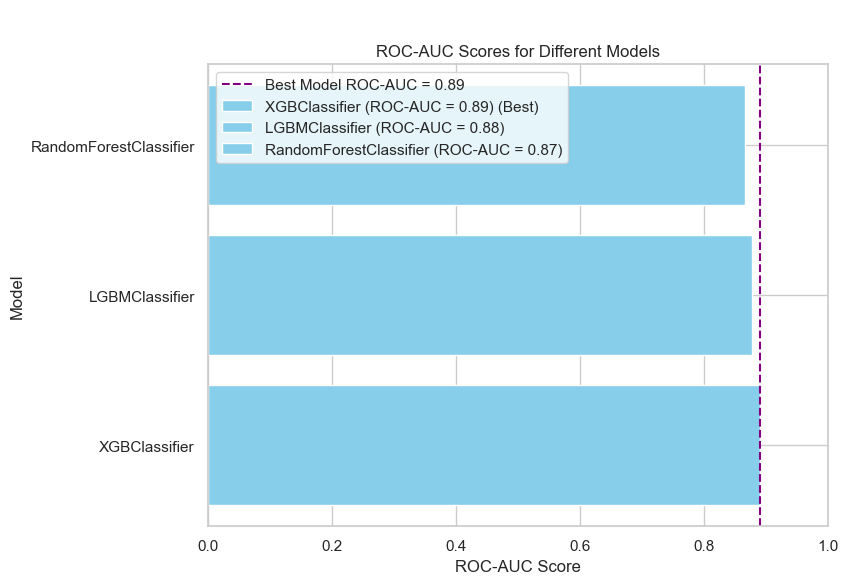


The best model is XGBClassifier with ROC-AUC: 0.89


In [48]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# To split the dataset into training and testing sets (X_train, X_test, y_train, y_test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgboost_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    reg_alpha=1,  # L1 regularization (Lasso)
    reg_lambda=1,  # L2 regularization (Ridge)
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.3,
    n_estimators=100,
    random_state=42
)


lgbm_model = LGBMClassifier(
    objective='binary',
    n_estimators=100,
    num_leaves=31,
    learning_rate=0.05,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    min_child_weight=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42,
    verbose=-1
)

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, 
    random_state=42
)

# List of models for iteration.
models = [xgboost_model, lgbm_model, random_forest_model]

# To initialize variables to keep track of the best model and its ROC-AUC.
best_model = None
best_roc_auc = 0
roc_auc_values = []

# To iterate through models and evaluate ROC-AUC.
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    roc_auc_values.append(roc_auc)
    
    print(f"\n\nROC-AUC for {type(model).__name__}: {roc_auc:.2f}")
    
    # To update best model if the current model has a higher ROC-AUC.
    if roc_auc > best_roc_auc:
        best_model = model
        best_roc_auc = roc_auc

# To create a function to plot ROC curves for each model.
def plot_roc_curve(models, X, y):
    plt.figure(figsize=(8, 6))
    for model in models:
        y_pred = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred)
        plt.plot(fpr, tpr, label=f"{type(model).__name__} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('\n\nROC Curve for Different Models')
    plt.legend(loc="lower right")
    plt.show()

# To call the function to plot ROC curves.
plot_roc_curve(models, X_test, y_test)

# To select the best model based on ROC-AUC.
best_model_index = np.argmax(roc_auc_values)
best_roc_auc = roc_auc_values[best_model_index]
best_model = models[best_model_index]

plt.figure(figsize=(8, 6))
for i, roc_auc in enumerate(roc_auc_values):
    label = f"{type(models[i]).__name__} (ROC-AUC = {roc_auc:.2f})"
    plt.barh(i, roc_auc, color='skyblue', label=label if i != best_model_index else label + " (Best)")
    
plt.axvline(x=best_roc_auc, color='purple', linestyle='--', label=f'Best Model ROC-AUC = {best_roc_auc:.2f}')
plt.yticks(np.arange(len(models)), [type(model).__name__ for model in models])
plt.xlabel('ROC-AUC Score')
plt.ylabel('Model')
plt.title('\n\nROC-AUC Scores for Different Models')
plt.xlim(0, 1)
plt.legend()
plt.show()

print(f"\nThe best model is {type(best_model).__name__} with ROC-AUC: {best_roc_auc:.2f}")